<a href="https://colab.research.google.com/github/Jsk10101/PlanetarySci-Phys5205/blob/main/Modeling_Earth_Using_Central_Pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling the Earth using Layered Models

This notebook goes through the process of understanding a diferentiated planet, seeing how compositional differences affect pressures, radii, and masses. The first section aims to see what a planet would be like if it is completely made of iron or silicates. Then, we begin to seperate the two, using the core-mantle boundary as a line between which the composition changes from iron to silicates. As the notebook continues, even more complex scenarios are laid out, adding in upper and lower layers of both the mantle and the core, adding transitional zones between layers, and adding the crust as well (even though the crust is essentially a negligable change).

### 1. Imports and Constants
This first block of code aims to import the necessary functions for this project as well as any constants that we will want to define. As you can see, this include the gravitational constant G, the mass and radius of the Earth, a conversion rate from pascals to gigapascals, and densities for Fe and silicates in their respective layers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as ac

# Constants
G = ac.G.value                      # Gravitational constant in m^3 / (kg s^2)
me = ac.M_earth.value               # Earth mass in kg
re = ac.R_earth.value               # Earth radius in m
gpa_to_pa = 1e9                     # Conversion factor: 1 GPa = 1e9 Pa

# Constant densities in kg/m³
constant_density_Fe = 11350.0      # Core density
constant_density_sil = 4500.0      # Mantle density

### 2. Pure Compositional Planets
In this section, we will begin to see what planets would look like if they were composed of single structures, in this case pure iron (Fe) or pure silicates. To build a planet this way, there is a range of arrays we need to build to store continuously changing masses, radii, and densities. In get_rho, we define either the constant density iron planet or the constant density silicate planet. Then, arrays are coded to build these planets, using gravity and central pressure to produce final masses and radii at each incremental interval. This is the first step in understanding the outcomes of planetary development.

In [2]:
# Function to return density (constant for now)
def get_rho(P, material='Fe'):
    if material == 'Fe':
        return constant_density_Fe
    else:
        return constant_density_sil

# Main function: builds model planets from central pressure
def build_planet_pcent_method(central_pressure_array, pout=0.0001 * gpa_to_pa, dr=100.0, material='Fe'):

    planet_radii = np.array([])
    planet_masses = np.array([])
    planet_densities = np.array([])

    for pcent in central_pressure_array:
        # Initialize arrays
        radius_array = np.array([dr])
        pressure_array = np.array([pcent])
        rho_array = np.array([get_rho(pcent, material)])
        mass_array = np.array([(4.0/3.0) * np.pi * rho_array[-1] * (dr**3)])

        # Integrate outward until surface pressure is reached
        while pressure_array[-1] > pout:
            grav_i = (G * mass_array[-1]) / (radius_array[-1]**2)
            pressure_iplus1 = pressure_array[-1] - (rho_array[-1] * grav_i * dr)
            mass_iplus1 = mass_array[-1] + (4.0 * np.pi * (radius_array[-1]**2) * rho_array[-1] * dr)
            density_iplus1 = get_rho(pressure_array[-1], material)

            # Append new values
            mass_array = np.append(mass_array, mass_iplus1)
            radius_array = np.append(radius_array, radius_array[-1] + dr)
            pressure_array = np.append(pressure_array, pressure_iplus1)
            rho_array = np.append(rho_array, density_iplus1)

        # Normalize to Earth units
        final_radius = radius_array[-1] / re
        final_mass = mass_array[-1] / me
        final_density = 5.51 * final_mass / (final_radius**3)  # Avg. density in Earth units

        # Store final values
        planet_radii = np.append(planet_radii, final_radius)
        planet_masses = np.append(planet_masses, final_mass)
        planet_densities = np.append(planet_densities, final_density)

    return planet_masses, planet_radii, planet_densities

Now that the function for building the planet has been written, we must apply it to the two different compositions. As you can see, the first builds a planet with pure iron and the second build a planet with pure silicates.

In [3]:
pcent = (10**np.linspace(2, 3, 10)) * gpa_to_pa
mp_fe, rp_fe, dens_fe = build_planet_pcent_method(pcent, pout=0.0001 * gpa_to_pa, dr=1e4)

pcent = (10**np.linspace(1.5, 2.25, 10)) * gpa_to_pa
mp_sil, rp_sil, dens_sil = build_planet_pcent_method(pcent, pout=0.0001 * gpa_to_pa, dr=1e4, material='Sil')

With our planet models built, lets see what they look like across the ranges of radii and masses

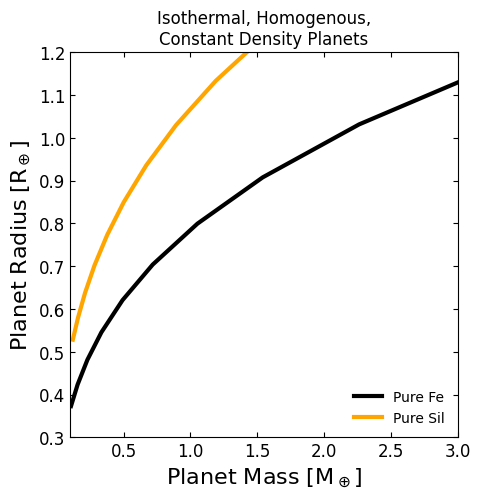

In [5]:
plt.figure(figsize=(5, 5))
plt.plot(mp_fe, rp_fe, 'k', label='Pure Fe', lw=3)
plt.plot(mp_sil, rp_sil, 'orange', label='Pure Sil', lw=3)

plt.xlim(0.1, 3)
plt.ylim(0.3, 1.2)
plt.tick_params(which='both', direction='in', labelsize=12, top=True, right=True)
plt.xlabel(r'Planet Mass [M$_\oplus$]', fontsize=16)
plt.ylabel(r'Planet Radius [R$_\oplus$]', fontsize=16)
plt.title('Isothermal, Homogenous,\nConstant Density Planets', loc='center', horizontalalignment='center')

try:
    from labellines import labelLines
    labelLines(fontsize=12)
except:
    plt.legend(loc='lower right', fontsize=10, frameon=False)

plt.show()

### 3. Calculate the Radius of the Core
To begin seeking a more differentiated planet, we must first know the place to differentiate from. Below is a code which solves for the core radius, taking our known values for the mass of the earth, the radius of the earth, as well as the densities of iron and silicates.

In [11]:
# Calculate radius of the core
core_radius = (((3 * me)/(4*np.pi) - (re**3 * constant_density_sil))/(constant_density_Fe - constant_density_sil))**(1/3)
print(f"Radius of the core: {core_radius/1000:.2f} kilometers")
print(f"Radius of the core: {core_radius/re:.2f} Earth radii")
M_c = 4/3 * np.pi * constant_density_Fe * core_radius**3
print(f"Mass of the core: {M_c/me:.2f} Earth masses")

Radius of the core: 3352.78 kilometers
Radius of the core: 0.53 Earth radii
Mass of the core: 0.30 Earth masses


### 4. A Separate Core and Mantle
We now know where the core-mantle boundary is located and can apply our planet building model we previously used, now switching from iron dominated to silicate dominated at this radius. The code below is almost identical to the previous one but has the compositional change written in.

In [12]:
# Function to return density based on material (core or mantle)
def get_rho(r, core_radius=core_radius):
    if r < core_radius:  # Inside the core
        return constant_density_Fe
    else:  # In the mantle
        return constant_density_sil

# Main function: builds model planets with a core-mantle boundary
def build_planet_with_core(central_pressure_array, core_radius=core_radius, pout=0.0001 * gpa_to_pa, dr=100.0):
    planet_radii = np.array([])
    planet_masses = np.array([])
    planet_densities = np.array([])

    for pcent in central_pressure_array:
        # Initialize arrays
        radius_array = np.array([dr])
        pressure_array = np.array([pcent])
        rho_array = np.array([get_rho(dr, core_radius)])  # Initial material is Fe (if r < core_radius)
        mass_array = np.array([(4.0 / 3.0) * np.pi * rho_array[-1] * (dr**3)])  # Initial mass (spherical shell)

        # Integrate outward until surface pressure is reached
        while pressure_array[-1] > pout:
            r = radius_array[-1]
            m = mass_array[-1]

            # Determine material (core or mantle) based on current radius
            rho = get_rho(r, core_radius)

            # Calculate gravitational acceleration and pressure gradient
            grav_i = (G * m) / (r**2)
            pressure_iplus1 = pressure_array[-1] - (rho * grav_i * dr)
            mass_iplus1 = m + (4.0 * np.pi * (r**2) * rho * dr)

            # Append new values
            radius_array = np.append(radius_array, r + dr)
            pressure_array = np.append(pressure_array, pressure_iplus1)
            mass_array = np.append(mass_array, mass_iplus1)
            rho_array = np.append(rho_array, rho)

        # Normalize to Earth units
        final_radius = radius_array[-1] / re
        final_mass = mass_array[-1] / me
        final_density = 5.51 * final_mass / (final_radius**3)  # Avg. density in Earth units

        # Store final values
        planet_radii = np.append(planet_radii, final_radius)
        planet_masses = np.append(planet_masses, final_mass)
        planet_densities = np.append(planet_densities, final_density)

    return planet_masses, planet_radii, planet_densities

# Core-Mantle Boundary (CMB) - Generate a transition model
pcent_cmb = (10**np.linspace(2, 3, 15)) * gpa_to_pa  # CMB pressure array, finer range
mp_cmb, rp_cmb, dens_cmb = build_planet_with_core(pcent_cmb, core_radius=core_radius, pout=0.0001 * gpa_to_pa, dr=1e3)

Like before, let's plot this information, overlaying the two-layer model on top of the pure iron and pure silicate models. This will give us a good idea to how they compare. Known planetary masses and radii are also placed on the plot to see how their composition and densities may differ.

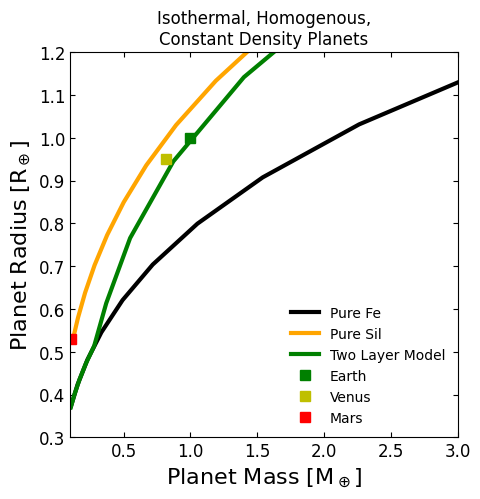

In [13]:
plt.figure(figsize=(5, 5))
plt.plot(mp_fe, rp_fe, 'k', label='Pure Fe', lw=3)
plt.plot(mp_sil, rp_sil, 'orange', label='Pure Sil', lw=3)
plt.plot(mp_cmb, rp_cmb, 'g', label='Two Layer Model', lw=3)
plt.plot(1.0, 1.0, 'gs', markersize=7, label = 'Earth')  # Earth
plt.plot(0.815, 0.951, 'ys', markersize=7, label = 'Venus')  # Venus
plt.plot(0.107, 0.531, 'rs', markersize=7, label = 'Mars')  # Mars

plt.xlim(0.1, 3)
plt.ylim(0.3, 1.2)
plt.tick_params(which='both', direction='in', labelsize=12, top=True, right=True)
plt.xlabel(r'Planet Mass [M$_\oplus$]', fontsize=16)
plt.ylabel(r'Planet Radius [R$_\oplus$]', fontsize=16)
plt.title('Isothermal, Homogenous,\nConstant Density Planets', loc='center', horizontalalignment='center')

try:
    from labellines import labelLines
    labelLines(fontsize=12)
except:
    plt.legend(loc='lower right', fontsize=10, frameon=False)

plt.show()


### 5. Earth's Pressure Profile
This section presents a new goal: How does the pressure change within the earth based on the densities of different regions? If we get a better understanding on this, we can have a better understanding of the equation of state. Since we are assuming an Isothermal model, the pressure is only dependent on the differential densities of the planet. To produce a more fine tuned result, we have now seperated our planet into even more regions, ranging in density values. This will give us a better pressure profile and teach us about how the pressure changes throughout the Earth.

The code block below does initiates similar functionalities to the solutions we derived previously in this notebook. We use these arrays in the same way, now including a pressure array and using this to plot. The actual seperation of boundaries was retrived via the internet, but the process of solving for these boundaries, like done for the core-mantle boundary in part 3, can be done here too, although with much more complex calculations.

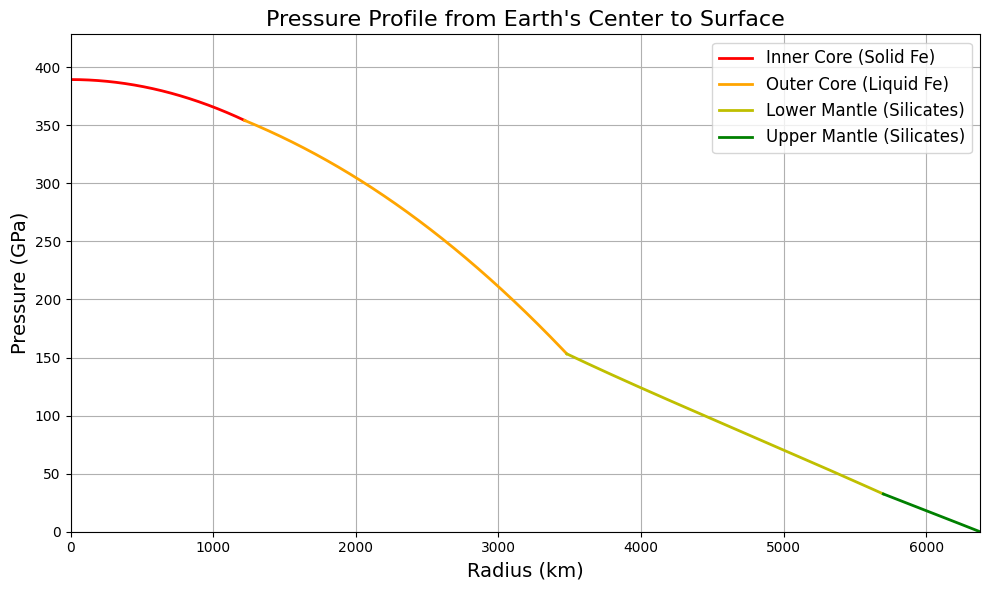

In [ ]:
# Core and Mantle Density Values (in kg/m³)
density_inner_core = 13000.0       # Inner Core (Solid Iron)
density_outer_core = 11500.0       # Outer Core (Liquid Iron)
density_lower_mantle = 5200.0      # Lower Mantle (Silicate)
density_upper_mantle = 4500.0      # Upper Mantle (Silicate)

# Define radii for layers (in meters)
inner_core_radius = 1.22e6         # 1220 km
outer_core_radius = 3.48e6         # 3480 km
lower_mantle_boundary = 5.7e6      # Approx. 5700 km
mantle_radius = re                 # Earth's surface radius (6371 km)

# Function to return density based on radius
def get_rho(r):
    if r < inner_core_radius:
        return density_inner_core
    elif r < outer_core_radius:
        return density_outer_core
    elif r < lower_mantle_boundary:
        return density_lower_mantle
    elif r <= mantle_radius:
        return density_upper_mantle
    else:
        return 0.0  # Outside Earth

# Function to calculate the pressure profile with layered core and mantle
def calculate_pressure_profile(dr=100.0, p_surface=0):
    radius_array = np.arange(mantle_radius, 0, -dr)  # From surface to center
    pressure_array = np.zeros_like(radius_array)
    mass_array = np.zeros_like(radius_array)

    # Calculate cumulative mass from surface inward
    total_mass = 0.0
    for i in range(len(radius_array) - 1, -1, -1):
        r = radius_array[i]
        rho = get_rho(r)
        shell_volume = 4.0 * np.pi * (r**2) * dr
        shell_mass = rho * shell_volume
        total_mass += shell_mass
        mass_array[i] = total_mass

    # Calculate pressure from surface inward
    pressure_array[0] = p_surface  # Surface pressure
    for i in range(1, len(radius_array)):
        r = radius_array[i-1]
        rho = get_rho(r)
        m = mass_array[i-1]
        g = G * m / (r**2)
        dp = rho * g * dr
        pressure_array[i] = pressure_array[i-1] + dp

    # Convert pressure to GPa and flip arrays for plotting center to surface
    pressure_array = pressure_array / gpa_to_pa
    radius_array = radius_array[::-1]
    pressure_array = pressure_array[::-1]

    return radius_array, pressure_array

# Calculate the pressure profile
radius, pressure = calculate_pressure_profile(dr=100.0)

# Plot the pressure profile with different colors for each region
plt.figure(figsize=(10, 6))

# Inner Core
plt.plot(radius[radius <= inner_core_radius] / 1e3,
         pressure[radius <= inner_core_radius],
         'r-', lw=2, label='Inner Core (Solid Fe)')

# Outer Core
plt.plot(radius[(radius > inner_core_radius) & (radius <= outer_core_radius)] / 1e3,
         pressure[(radius > inner_core_radius) & (radius <= outer_core_radius)],
         'orange', lw=2, label='Outer Core (Liquid Fe)')

# Lower Mantle
plt.plot(radius[(radius > outer_core_radius) & (radius <= lower_mantle_boundary)] / 1e3,
         pressure[(radius > outer_core_radius) & (radius <= lower_mantle_boundary)],
         'y-', lw=2, label='Lower Mantle (Silicates)')

# Upper Mantle
plt.plot(radius[(radius > lower_mantle_boundary) & (radius <= mantle_radius)] / 1e3,
         pressure[(radius > lower_mantle_boundary) & (radius <= mantle_radius)],
         'g-', lw=2, label='Upper Mantle (Silicates)')

# Label axes and title
plt.xlabel('Radius (km)', fontsize=14)
plt.ylabel('Pressure (GPa)', fontsize=14)
plt.title('Pressure Profile from Earth\'s Center to Surface', fontsize=16)

# Grid, limits, legend
plt.grid(True)
plt.xlim(0, re / 1e3)
plt.ylim(0, max(pressure) * 1.1)
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

We will repeat the same process done above but add even more layers to try and get an even finer tuned model. A crust and a transitional zone between the upper and lower mantle are given to shift the densities, making the transitions between densities much more smooth than any of the previous models. Now, our model is starting to look much smoother between boundaries and the density changes are much smaller.

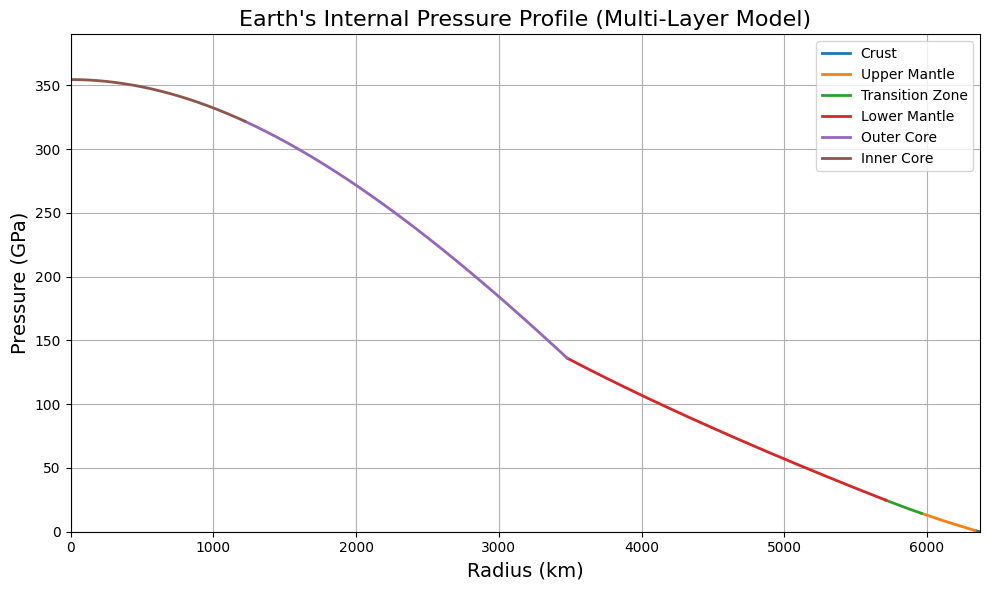

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Constants ===
G = 6.67430e-11        # gravitational constant (m³/kg/s²)
gpa_to_pa = 1e9        # 1 GPa = 1e9 Pa
re = 6.371e6           # Earth's radius in meters

# === Earth Layer Structure: (name, r_outer, r_inner, rho_outer, rho_inner) ===
layers = [
    ("Crust",            6.371e6, 6.336e6, 2700, 3000),
    ("Upper Mantle",     6.336e6, 5.961e6, 3300, 3900),
    ("Transition Zone",  5.961e6, 5.711e6, 3900, 4400),
    ("Lower Mantle",     5.711e6, 3.480e6, 4400, 5600),
    ("Outer Core",       3.480e6, 1.220e6, 9900, 12200),
    ("Inner Core",       1.220e6, 0.0,     12200, 13000),
]

# === Density function with linear interpolation ===
def get_density(r):
    for name, r_outer, r_inner, rho_outer, rho_inner in layers:
        if r_inner <= r <= r_outer:
            return rho_inner + (rho_outer - rho_inner) * (r - r_inner) / (r_outer - r_inner)
    return 0  # Outside Earth

# === Pressure profile calculation from surface inward ===
def calculate_pressure_profile(dr=100.0, p_surface=0):
    radius_array = np.arange(re, 0, -dr)  # From surface to center
    pressure_array = np.zeros_like(radius_array)
    mass_array = np.zeros_like(radius_array)

    total_mass = 0.0
    for i in range(len(radius_array)-1, -1, -1):
        r = radius_array[i]
        rho = get_density(r)
        dV = 4 * np.pi * r**2 * dr
        shell_mass = rho * dV
        total_mass += shell_mass
        mass_array[i] = total_mass

    pressure_array[0] = p_surface
    for i in range(1, len(radius_array)):
        r = radius_array[i-1]
        rho = get_density(r)
        m = mass_array[i-1]
        g = G * m / (r**2)
        dp = rho * g * dr
        pressure_array[i] = pressure_array[i-1] + dp

    return radius_array[::-1], (pressure_array[::-1] / gpa_to_pa)  # Flip for plotting center to surface

# === Plotting function with layer coloring ===
def plot_pressure_profile(radius_array, pressure_array):
    plt.figure(figsize=(10, 6))
    km_radius = radius_array / 1e3

    # Plot each layer with a unique color
    color_map = plt.get_cmap("tab10")
    for i, (name, r_outer, r_inner, _, _) in enumerate(layers):
        mask = (radius_array >= r_inner) & (radius_array <= r_outer)
        plt.plot(km_radius[mask], pressure_array[mask], lw=2, label=name, color=color_map(i % 10))

    plt.xlabel("Radius (km)", fontsize=14)
    plt.ylabel("Pressure (GPa)", fontsize=14)
    plt.title("Earth's Internal Pressure Profile (Multi-Layer Model)", fontsize=16)
    plt.grid(True)
    plt.legend()
    plt.xlim(0, re / 1e3)
    plt.ylim(0, np.max(pressure_array) * 1.1)
    plt.tight_layout()
    plt.show()

# === Run it ===
radius, pressure = calculate_pressure_profile(dr=100.0)
plot_pressure_profile(radius, pressure)


The final plot, as you can see, is not much different from the one done before it, however this is mainly due to the fact that the transition zone and crust are such small pieces of the mantle, which is only about half the radius of the earth anyways. The slight transitional smoothness, however, between each of these mantle layers can be seen. In the future, a more finely tuned model can be built really looking at each layer and transition the pressures differentially across the radius of the earth instead of using concrete density values for regions